In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
dataset = pd.read_csv('02-14-2018.csv')
print(dataset.shape)
dataset.info()

(1048575, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std   

In [4]:
#check deplicated
dataset.duplicated().value_counts()
dataset = dataset.drop_duplicates()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 822947 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           822947 non-null  int64  
 1   Protocol           822947 non-null  int64  
 2   Timestamp          822947 non-null  object 
 3   Flow Duration      822947 non-null  int64  
 4   Tot Fwd Pkts       822947 non-null  int64  
 5   Tot Bwd Pkts       822947 non-null  int64  
 6   TotLen Fwd Pkts    822947 non-null  int64  
 7   TotLen Bwd Pkts    822947 non-null  int64  
 8   Fwd Pkt Len Max    822947 non-null  int64  
 9   Fwd Pkt Len Min    822947 non-null  int64  
 10  Fwd Pkt Len Mean   822947 non-null  float64
 11  Fwd Pkt Len Std    822947 non-null  float64
 12  Bwd Pkt Len Max    822947 non-null  int64  
 13  Bwd Pkt Len Min    822947 non-null  int64  
 14  Bwd Pkt Len Mean   822947 non-null  float64
 15  Bwd Pkt Len Std    822947 non-null  float64
 16  F

In [5]:
#drop colunm of Flow Byts/s
DF = dataset.drop(['Flow Byts/s'], axis = 1)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822947 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           822947 non-null  int64  
 1   Protocol           822947 non-null  int64  
 2   Timestamp          822947 non-null  object 
 3   Flow Duration      822947 non-null  int64  
 4   Tot Fwd Pkts       822947 non-null  int64  
 5   Tot Bwd Pkts       822947 non-null  int64  
 6   TotLen Fwd Pkts    822947 non-null  int64  
 7   TotLen Bwd Pkts    822947 non-null  int64  
 8   Fwd Pkt Len Max    822947 non-null  int64  
 9   Fwd Pkt Len Min    822947 non-null  int64  
 10  Fwd Pkt Len Mean   822947 non-null  float64
 11  Fwd Pkt Len Std    822947 non-null  float64
 12  Bwd Pkt Len Max    822947 non-null  int64  
 13  Bwd Pkt Len Min    822947 non-null  int64  
 14  Bwd Pkt Len Mean   822947 non-null  float64
 15  Bwd Pkt Len Std    822947 non-null  float64
 16  F

In [6]:
#change the type 
Timestamp = sorted(DF['Timestamp'].unique())
Timestamp_mapping = dict(zip(Timestamp, range(0, len(Timestamp) + 1)))
DF['Timestamp'] = DF['Timestamp'].map(Timestamp_mapping).astype(float)

Label = sorted(DF['Label'].unique())
Label_mapping = dict(zip(Label, range(0, len(Label) + 1)))
DF['Label'] = DF['Label'].map(Label_mapping).astype(float)

DF_new = DF[np.isfinite(DF).all(1)]

Text(0, 0.5, 'number')

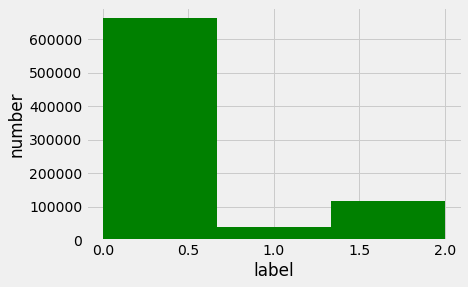

In [7]:
#check imbalancing
plt.style.use('fivethirtyeight')
plt.hist(DF_new['Label'],bins=3,color='green',density=False)
plt.xlabel('label')
plt.ylabel('number')

In [8]:
#get a sample of 5000
sample = DF_new.sample(n=5000, replace = False, weights = None, random_state = None, axis = 0)
print(sample.shape)
print(sample.columns.values)


(5000, 79)
['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Pkts/s'
 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max' 'Flow IAT Min'
 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Min'
 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min'
 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags' 'Bwd URG Flags'
 'Fwd Header Len' 'Bwd Header Len' 'Fwd Pkts/s' 'Bwd Pkts/s' 'Pkt Len Min'
 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std' 'Pkt Len Var' 'FIN Flag Cnt'
 'SYN Flag Cnt' 'RST Flag Cnt' 'PSH Flag Cnt' 'ACK Flag Cnt'
 'URG Flag Cnt' 'CWE Flag Count' 'ECE Flag Cnt' 'Down/Up Ratio'
 'Pkt Size Avg' 'Fwd Seg Size Avg' 'Bwd Seg Size Avg' 'Fwd Byts/b Avg'
 'Fwd Pkts/b Avg' 'Fwd Blk Rate Avg' 'Bwd Byts/b Avg' 'Bwd Pkts/b Avg'
 'Bwd Blk Rate Avg' 'Su

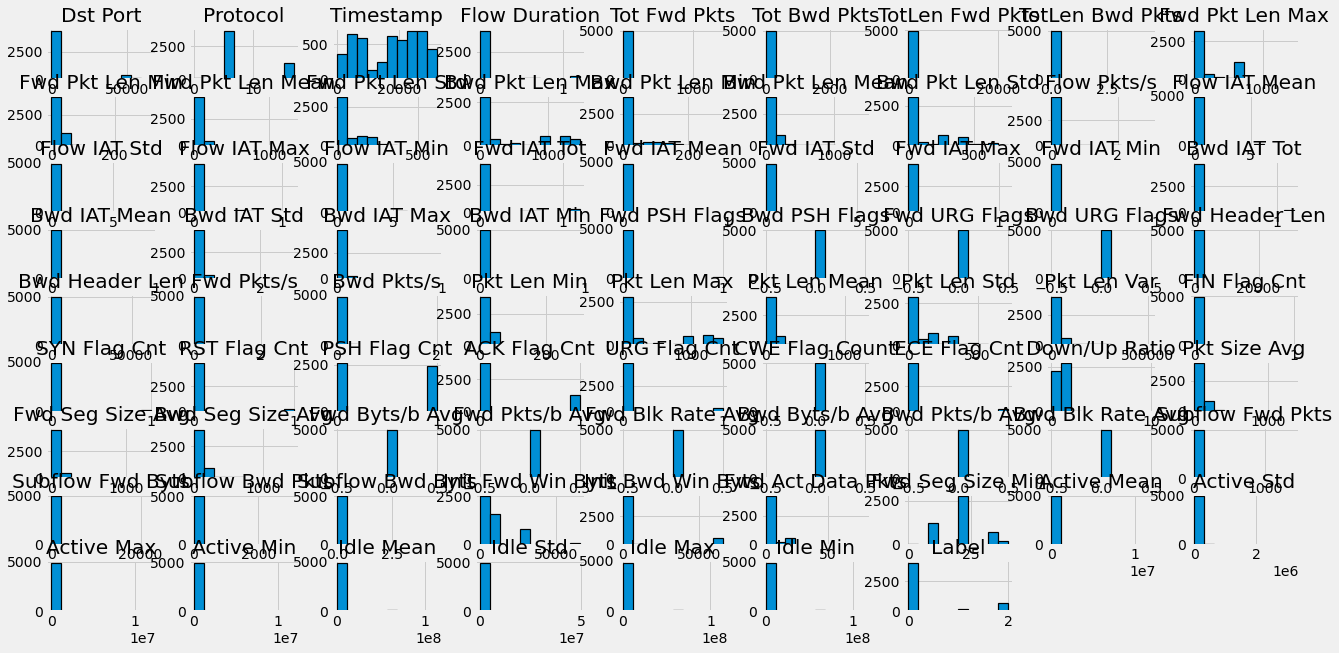

In [9]:
#data analysis
sample.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

<AxesSubplot:>

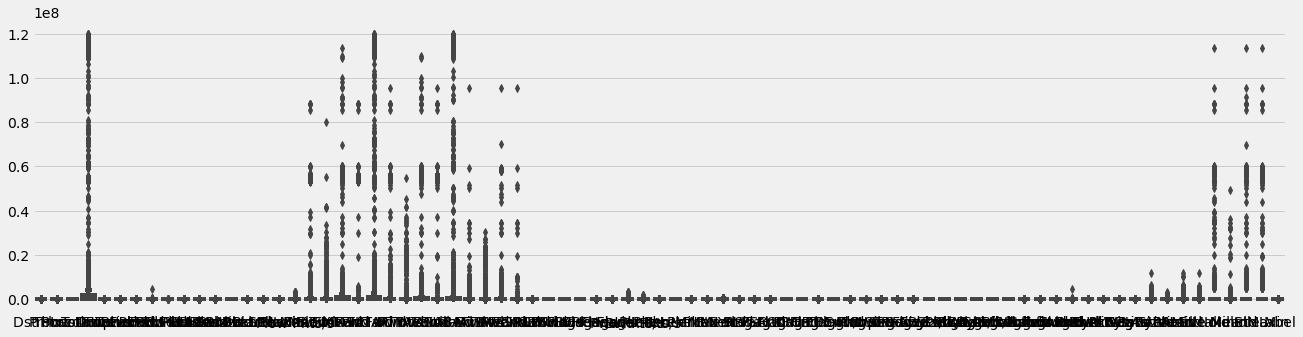

In [10]:
#check if any exceptions
plt.figure(figsize=(20,5)) 
sns.boxplot(data=sample)

In [11]:
#train and test on sample
x = sample[['Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min',
 'Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min',
 'Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min',
 'Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
 'Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min',
 'Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt',
 'SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt',
 'URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio',
 'Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg',
 'Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts',
 'Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts',
 'Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean',
 'Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max',
 'Idle Min']].values
y = sample['Label'].values
train_x, test_x = train_test_split(x, test_size = 0.3)
train_y, test_y = train_test_split(y, test_size = 0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
sample.info()


(3500, 78)
(1500, 78)
(3500,)
(1500,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 932736 to 8072
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           5000 non-null   int64  
 1   Protocol           5000 non-null   int64  
 2   Timestamp          5000 non-null   float64
 3   Flow Duration      5000 non-null   int64  
 4   Tot Fwd Pkts       5000 non-null   int64  
 5   Tot Bwd Pkts       5000 non-null   int64  
 6   TotLen Fwd Pkts    5000 non-null   int64  
 7   TotLen Bwd Pkts    5000 non-null   int64  
 8   Fwd Pkt Len Max    5000 non-null   int64  
 9   Fwd Pkt Len Min    5000 non-null   int64  
 10  Fwd Pkt Len Mean   5000 non-null   float64
 11  Fwd Pkt Len Std    5000 non-null   float64
 12  Bwd Pkt Len Max    5000 non-null   int64  
 13  Bwd Pkt Len Min    5000 non-null   int64  
 14  Bwd Pkt Len Mean   5000 non-null   float64
 15  Bwd Pkt Len Std    5000 non-n

In [12]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x, train_y)
model.score(test_x, test_y)
print(model.score(test_x, test_y))
prediction = model.predict(test_x)

from sklearn.metrics import classification_report
predict = model.predict(test_x) 
print(classification_report(test_y,prediction))


0.09066666666666667
              precision    recall  f1-score   support

         0.0       0.82      0.06      0.11      1204
         1.0       0.04      0.89      0.08        65
         2.0       0.13      0.04      0.06       231

    accuracy                           0.09      1500
   macro avg       0.33      0.33      0.08      1500
weighted avg       0.68      0.09      0.10      1500



In [13]:
#Xgboost
from sklearn import metrics 
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6, learning_rate = 0.05, n_estimators = 200)
model.fit(train_x, train_y)
model.score(test_x, test_y)
prediction = model.predict(test_x)
results = model.predict(test_x)

from sklearn.metrics import classification_report
predict = model.predict(test_x) 
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      1204
         1.0       0.00      0.00      0.00        65
         2.0       0.09      0.00      0.01       231

    accuracy                           0.80      1500
   macro avg       0.30      0.33      0.30      1500
weighted avg       0.66      0.80      0.71      1500



In [15]:
#lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(train_x, train_y)
model.score = model.score(test_x, test_y)
prediction = model.predict(test_x)

print(classification_report(test_y,prediction))

E:\Anaconda\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1231
         1.0       0.00      0.00      0.00        63
         2.0       0.21      0.03      0.06       206

    accuracy                           0.81      1500
   macro avg       0.34      0.34      0.32      1500
weighted avg       0.70      0.81      0.74      1500



In [14]:
#SVM
from sklearn.svm import SVC, LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)
model.score = model.score(test_x, test_y)
prediction = model.predict(test_x)

print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70      1204
         1.0       0.00      0.00      0.00        65
         2.0       0.15      0.35      0.21       231

    accuracy                           0.56      1500
   macro avg       0.32      0.33      0.31      1500
weighted avg       0.67      0.56      0.60      1500



/Users/yichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


whole dataset

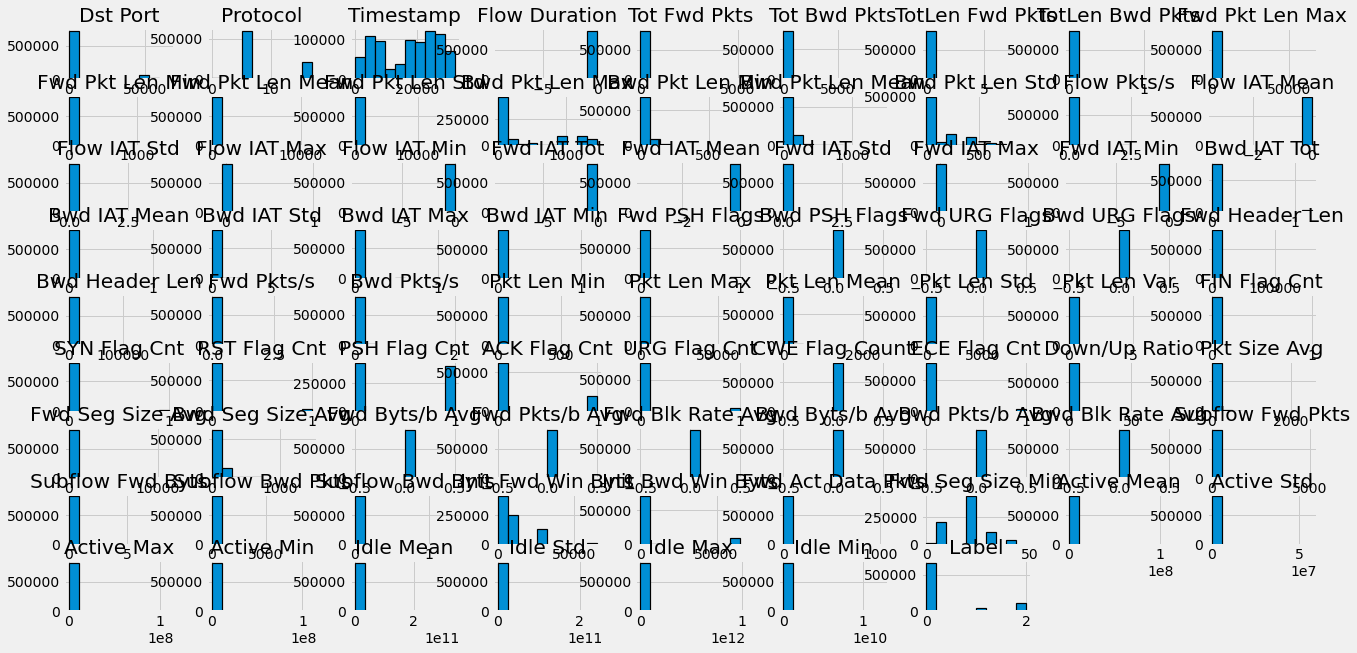

In [15]:
#data analysis
DF_new.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

<AxesSubplot:>

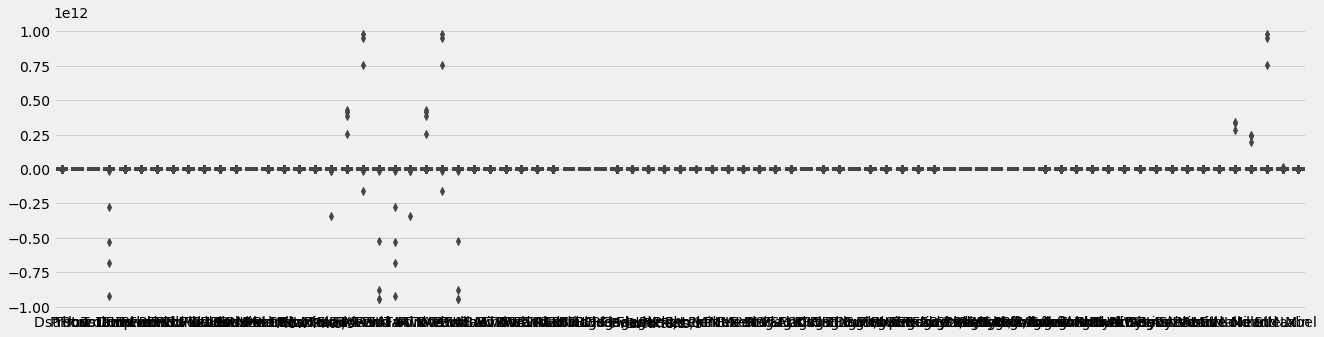

In [16]:
#check if any exceptions
plt.figure(figsize=(20,5)) 
sns.boxplot(data=DF_new)

In [17]:
#train and test on whole dataset
x = DF_new[['Dst Port','Protocol','Timestamp','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min',
 'Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min',
 'Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min',
 'Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
 'Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min',
 'Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt',
 'SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt',
 'URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio',
 'Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg',
 'Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts',
 'Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts',
 'Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean',
 'Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max',
 'Idle Min']].values
y = DF_new['Label'].values
train_x, test_x = train_test_split(x, test_size = 0.3)
train_y, test_y = train_test_split(y, test_size = 0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
DF_new.info()


(573388, 78)
(245738, 78)
(573388,)
(245738,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 819126 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           819126 non-null  int64  
 1   Protocol           819126 non-null  int64  
 2   Timestamp          819126 non-null  float64
 3   Flow Duration      819126 non-null  int64  
 4   Tot Fwd Pkts       819126 non-null  int64  
 5   Tot Bwd Pkts       819126 non-null  int64  
 6   TotLen Fwd Pkts    819126 non-null  int64  
 7   TotLen Bwd Pkts    819126 non-null  int64  
 8   Fwd Pkt Len Max    819126 non-null  int64  
 9   Fwd Pkt Len Min    819126 non-null  int64  
 10  Fwd Pkt Len Mean   819126 non-null  float64
 11  Fwd Pkt Len Std    819126 non-null  float64
 12  Bwd Pkt Len Max    819126 non-null  int64  
 13  Bwd Pkt Len Min    819126 non-null  int64  
 14  Bwd Pkt Len Mean   819126 non-null  float64
 15  Bwd 

In [18]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x, train_y)
model.score(test_x, test_y)
print(model.score(test_x, test_y))
prediction = model.predict(test_x)

from sklearn.metrics import classification_report
predict = model.predict(test_x) 
print(classification_report(test_y,prediction))

0.09678600786203193
              precision    recall  f1-score   support

         0.0       0.81      0.06      0.12    198484
         1.0       0.05      0.93      0.09     11966
         2.0       0.15      0.00      0.01     35288

    accuracy                           0.10    245738
   macro avg       0.33      0.33      0.07    245738
weighted avg       0.67      0.10      0.10    245738



In [19]:
#Xgboost
from sklearn import metrics 
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=6, learning_rate = 0.05, n_estimators = 200)
model.fit(train_x, train_y)
model.score(test_x, test_y)
prediction = model.predict(test_x)
results = model.predict(test_x)

from sklearn.metrics import classification_report
predict = model.predict(test_x) 
print(classification_report(test_y,prediction))

/Users/yichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89    198484
         1.0       0.00      0.00      0.00     11966
         2.0       0.00      0.00      0.00     35288

    accuracy                           0.81    245738
   macro avg       0.27      0.33      0.30    245738
weighted avg       0.65      0.81      0.72    245738



/Users/yichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(train_x, train_y)
model.score = model.score(test_x, test_y)
prediction = model.predict(test_x)

print(classification_report(test_y,prediction))

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89    198397
         1.0       0.00      0.00      0.00     11854
         2.0       0.00      0.00      0.00     35487

    accuracy                           0.81    245738
   macro avg       0.27      0.33      0.30    245738
weighted avg       0.65      0.81      0.72    245738



In [20]:
#SVM
from sklearn.svm import SVC, LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)
model.score = model.score(test_x, test_y)
prediction = model.predict(test_x)

print(classification_report(test_y,prediction))

/Users/yichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83    198484
         1.0       0.05      0.14      0.07     11966
         2.0       0.15      0.02      0.03     35288

    accuracy                           0.70    245738
   macro avg       0.33      0.33      0.31    245738
weighted avg       0.68      0.70      0.68    245738

